1. Code hàm tìm ra ngưỡng chia tốt nhất cho 1 node với data sample

2. Code hàm xây dựng model với data sample

3. Vẽ decision boundary cho data sample với model trên


In [105]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [106]:
X = np.array([[1, 3], [2, 2], [3, 2], [4, 1], [4, 2], 
              [2, 6], [4, 6], [3, 7], [2, 8], [1, 9],
              [8, 6], [9, 7], [7, 9], [10, 6], [8, 9],
              [8, 4], [9, 1], [10, 3], [8, 3], [9, 3]])
y = np.ones(20)
y[:5] = 0 

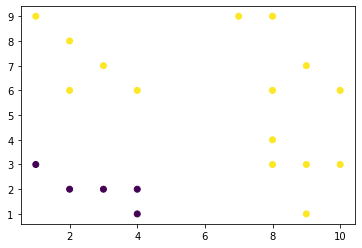

In [107]:
plt.scatter(X[:, 0], X[:, 1], c = y )

In [108]:
data = pd.read_csv("https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv")
data.head(n = 5)

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [109]:
data = data.rename(columns = {"Thời gian làm việc":"time", "Lương":"wage","Cho vay": 'accept'},inplace=False)
data.head(n = 4 )
data.shape

(20, 3)

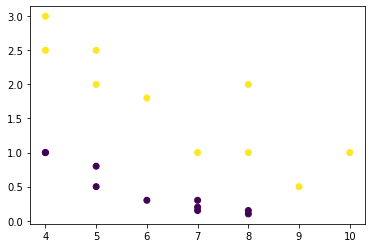

In [110]:
plt.scatter(data.wage, data.time, c = data.accept )

In [116]:
def gini_score(n1,n2):
  if n1 + n2 == 0 :
    return 1 
  return 1 - (n1/(n1+n2))**2 - (n2/(n1+n2))**2
# 1. Code hàm tìm ra ngưỡng chia tốt nhất cho 1 node với data sample
def gini_index(g_parent, n1, g1, n2, g2): 
  return g_parent- (n1/(n1+n2))*g1 - (n2/(n1+n2))*g2

def divided_x(data, gini_index_start,g_parent, start, end):
  list1 = {}
  n0g1 = n1g1  = n0g2  = n1g2 = 0 
  for i in range(start, end): 
    n0g1 = len(data[(data['wage'] >= i) & (data['accept'] == 1)]) 
    n1g1 = len(data[(data['wage'] >= i) & (data['accept'] == 0)])
    n0g2 = len(data[(data['wage'] < i) & (data['accept'] == 1)])
    n1g2 = len(data[(data['wage'] < i) & (data['accept'] == 0)])
    g1 = gini_score(n0g1,n1g1)
    g2 = gini_score(n0g2, n1g2)
    gini_index_new  = gini_index(g_parent, n0g1+ n1g1, g1, n0g2+n1g2, g2)
    if gini_index_new > gini_index_start:
      # print(i, gini_index_start, gini_index_new)
      gini_index_start = gini_index_new
    elif (gini_index_new < gini_index_start) and (gini_index_new > 0 ): 
      return i - 1
  return None
def divided_y(data, gini_index_start,g_parent, start, end):
  list1 = {}
  n0g1 = n1g1  = n0g2  = n1g2 = 0 
  for i in np.arange(start, end, 0.5): 
    n0g1 = len(data[(data['time'] >= i) & (data['accept'] == 1)]) 
    n1g1 = len(data[(data['time'] >= i) & (data['accept'] == 0)])
    n0g2 = len(data[(data['time'] < i) & (data['accept'] == 1)])
    n1g2 = len(data[(data['time'] < i) & (data['accept'] == 0)])
    g1 = gini_score(n0g1,n1g1)
    g2 = gini_score(n0g2, n1g2)
    gini_index_new  = gini_index(g_parent, n0g1+ n1g1, g1, n0g2+n1g2, g2)
    if gini_index_new > gini_index_start:
      # print(i, gini_index_start, gini_index_new)
      gini_index_start = gini_index_new
    elif (gini_index_new < gini_index_start) and (gini_index_new > 0 ): 
      return i - 0.5 
      # print(i, gini_index_start, gini_index_new)
      
  return None

In [117]:
g_parent = gini_score(10,10)
n0g1 = 0 
n1g1 = 0 
n0g2 = 0 
n1g2 = 0 
i = 4 
n0g1 = len(data[(data['wage'] >= 4) & (data['accept'] == 1)]) 
n1g1 = len(data[(data['wage'] >= 4) & (data['accept'] == 0)])
n0g2 = len(data[(data['wage'] < 4) & (data['accept'] == 1)])
n1g2 = len(data[(data['wage'] < 4) & (data['accept'] == 0)])
g1 = gini_score(n0g1,n1g1)
g2 = gini_score(n0g2, n1g2)
gini_index_start  = gini_index(g_parent, n0g1+ n1g1, g1, n0g2+n1g2, g2)

i = divided_x(data, gini_index_start, g_parent,5 , 11)
j = divided_y(data, gini_index_start, g_parent, 0, 3 )
print(i,j)

9 1.0


<function matplotlib.pyplot.show>

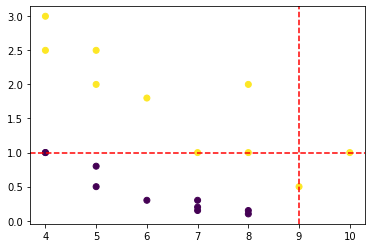

In [119]:
plt.scatter(data.wage, data.time, c = data.accept )
plt.axhline(j, color="red", linestyle="--")
plt.axvline(i, color="red", linestyle="--")
plt.show